In [2]:
# ==============================
# PROBLEM 2b
# ==============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Housing.csv")

# Extended features for Problem 2b (same as Problem 1b)
features_2b = [
    "area", "bedrooms", "bathrooms", "stories",
    "mainroad", "guestroom", "basement",
    "hotwaterheating", "airconditioning",
    "parking", "prefarea"
]

X = df[features_2b].copy()
y = df["price"].values.astype(float)

# Encode yes/no categorical variables (1 = yes, 0 = no)
binary_cols = ["mainroad", "guestroom", "basement",
               "hotwaterheating", "airconditioning", "prefarea"]

for col in binary_cols:
    X[col] = X[col].map({"yes": 1, "no": 0})

X = X.values.astype(float)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Add bias column
def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]


In [3]:
# Normalization (0–1 scaling)
def normalize(X_train, X_val):
    min_vals = X_train.min(axis=0)
    max_vals = X_train.max(axis=0)
    X_train_norm = (X_train - min_vals) / (max_vals - min_vals)
    X_val_norm = (X_val - min_vals) / (max_vals - min_vals)
    return X_train_norm, X_val_norm

# Standardization (z-score scaling)
def standardize(X_train, X_val):
    mean_vals = X_train.mean(axis=0)
    std_vals = X_train.std(axis=0)
    X_train_std = (X_train - mean_vals) / std_vals
    X_val_std = (X_val - mean_vals) / std_vals
    return X_train_std, X_val_std


In [4]:
def gradient_descent(X_train, y_train, X_val, y_val, lr=0.05, n_iter=500):
    m, n = X_train.shape
    theta = np.zeros(n)
    train_losses, val_losses = [], []

    for i in range(n_iter):
        # Predictions
        y_pred = X_train @ theta
        error = y_pred - y_train

        # Gradient
        grad = (2/m) * (X_train.T @ error)

        # Update
        theta -= lr * grad

        # Losses
        train_loss = np.mean((X_train @ theta - y_train) ** 2)
        val_loss = np.mean((X_val @ theta - y_val) ** 2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses


In [5]:
results = {}

# Baseline (raw input, no scaling)
theta_base, train_base, val_base = gradient_descent(
    add_bias(X_train), y_train, add_bias(X_val), y_val, lr=1e-8, n_iter=500
)
results["Baseline"] = (theta_base, train_base, val_base)

# Normalization
X_train_norm, X_val_norm = normalize(X_train, X_val)
theta_norm, train_norm, val_norm = gradient_descent(
    add_bias(X_train_norm), y_train, add_bias(X_val_norm), y_val, lr=0.05, n_iter=500
)
results["Normalization"] = (theta_norm, train_norm, val_norm)

# Standardization
X_train_std, X_val_std = standardize(X_train, X_val)
theta_std, train_std, val_std = gradient_descent(
    add_bias(X_train_std), y_train, add_bias(X_val_std), y_val, lr=0.05, n_iter=500
)
results["Standardization"] = (theta_std, train_std, val_std)


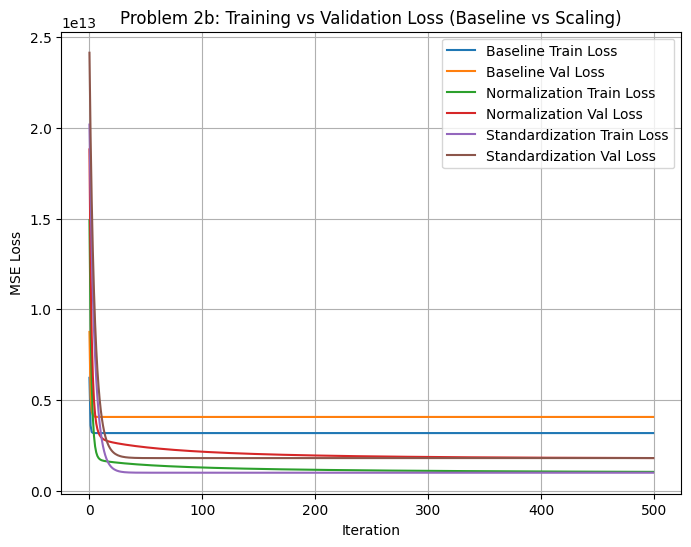

In [6]:
plt.figure(figsize=(8,6))
for key, (theta, train_losses, val_losses) in results.items():
    plt.plot(train_losses, label=f"{key} Train Loss")
    plt.plot(val_losses, label=f"{key} Val Loss")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Problem 2b: Training vs Validation Loss (Baseline vs Scaling)")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
for key, (theta, train_losses, val_losses) in results.items():
    print(f"{key} approach:")
    print("Final Parameters:", theta)
    print("Final Training Loss:", train_losses[-1])
    print("Final Validation Loss:", val_losses[-1])
    print("="*60)


Baseline approach:
Final Parameters: [4.01448686e+00 8.37917199e+02 1.46244353e+01 7.79440807e+00
 1.21390784e+01 3.43727665e+00 1.25826965e+00 2.81834378e+00
 5.09686638e-01 3.21974530e+00 3.13260982e+00 1.55078496e+00]
Final Training Loss: 3178661572662.91
Final Validation Loss: 4068064525843.144
Normalization approach:
Final Parameters: [1845235.62270221 2328830.14281496 1050808.71799345 2360914.67270321
 1294476.2083236   528605.73464135  325885.68211004  411146.1601441
  705747.05492607  867456.20497911  997151.43654984  656056.70461267]
Final Training Loss: 1039599988357.2062
Final Validation Loss: 1801763344050.714
Standardization approach:
Final Parameters: [4706527.3853211   523387.27548844   58623.06245176  528975.1075954
  365907.58043609  144130.60780487   93366.5047969   208520.89032996
  155907.28690611  372995.82851972  211306.48839562  269576.1656442 ]
Final Training Loss: 992481000009.7854
Final Validation Loss: 1800793719683.9543
